In [1]:
import scipy.spatial.distance as distance
import numpy as np
import pandas as pd
import os
import itertools
import random
from tqdm import tqdm
from matplotlib import pyplot as plt
from matplotlib_inline import backend_inline
import warnings
warnings.filterwarnings('ignore')
backend_inline.set_matplotlib_formats('svg')
df_norm = pd.read_csv(os.path.join(os.getcwd(),'..','glove.6B','glove.6B.50d_rmsnorm.csv'), index_col = 0)

In [2]:
def cosDistance(word_1, word_2):
    if word_1 not in df_norm.index or word_2 not in df_norm.index:
        raise ValueError("Word not in dictionary")
    cosDistance = df_norm.loc[word_1].dot(df_norm.loc[word_2])/(np.sqrt(np.sum(df_norm.loc[word_1]**2))*np.sqrt(np.sum(df_norm.loc[word_2]**2)))
    return 1-cosDistance
print(f"dog and bone: {cosDistance('dog', 'bone')}")
print(f"dog and bird: {distance.cosine(df_norm.loc['dog'], df_norm.loc['bone'])}")

dog and bone: 0.611937350047098
dog and bird: 0.6119373500470981


In [3]:
def DAT(list, number = 10):
    uniques = []
    for word in list:
        valid = False
        if word in df_norm.index:
            valid = True
        if valid and word not in uniques:
            uniques.append(word)
    
    if len(uniques) < number:
        raise ValueError("Not enough unique words in list, you need at least 10 valid words")
    else:
        uniques = uniques[:10]
        # print(f"Words used: {uniques}")
    
    distances = []
    for word1, word2 in itertools.combinations(uniques, 2):
        dist = cosDistance(word1, word2)
        distances.append(dist)

    # Compute the DAT score (average semantic distance multiplied by 100)
    return (sum(distances) / len(distances)) * 100


In [4]:
my_list = ['perception','animacy','gene', 'nail','wuthering', 'genshin','artificial','zombie','twilight','curve']
my_DAT = DAT(my_list)
print(f"DAT score: {my_DAT}")

DAT score: 90.77663365297917


In [34]:
my_list2 = ['earl','corus','sb','mp','genshin','wuthering','animacy','chlorophyll','eva','python']
print(DAT(my_list2))

103.05175119005605


In [ ]:
list = ['table', 'foliage', 'snow', 'conversation', 'magpie', 'carbon', 'wife', 'transaction', 't-rex', 'jupiter']
for i in list:
    if i not in df_norm.index:
        print(i)
print(DAT(list))

89.13827193980629


In [39]:
list_dys = ['apple', 'red', 'airplane', 'earth', 'mankind', 'space', 'core', 'dys', 'mind', 'agriculture']
print(DAT(list_dys))
print('dys' in df_norm.index)


76.01739655904208
True


In [43]:
print('zhejiang' in df_norm.index)
print('jerusalem' in df_norm.index)
print(cosDistance('zhejiang', 'jerusalem'))

True
True
0.948960072642011


In [35]:
list_jrn = ['exploit', 'instinct', 'committee', 'subordinate', 'distract', 'supernova', 'limitation', 'burden', 'operate', 'helmet']
print(DAT(list_jrn))

80.00868081210672


In [5]:
import re

def get_word(df_norm):
    """
    Filter DataFrame to keep only valid word entries
    
    Args:
        df_norm (pd.DataFrame): Input DataFrame with normalized vectors
        
    Returns:
        pd.DataFrame: Filtered DataFrame containing only valid word entries
    """
    def is_valid_word(word):
        # Strip unwanted characters and convert to lowercase
        clean = re.sub(r"[^a-zA-Z- ]+", "", word).strip().lower()
        
        # Check if word is too short
        if len(clean) <= 1:
            return False
            
        # Generate possible variations
        candidates = []
        if " " in clean:
            candidates.append(re.sub(r" +", "-", clean))
            candidates.append(re.sub(r" +", "", clean))
        else:
            candidates.append(clean)
            if "-" in clean:
                candidates.append(re.sub(r"-+", "", clean))
                
        # Return True if the word or any of its variations is valid
        return any(candidate == word for candidate in candidates)

    # Ensure the index is of string type
    df_norm.index = df_norm.index.astype(str)
    
    # Filter the DataFrame using the validation function
    mask = df_norm.index.map(is_valid_word)
    df_norm_wordOnly = df_norm[mask].copy()
    
    return df_norm_wordOnly


df_norm_wordOnly = get_word(df_norm)
print(f"Original shape: {df_norm.shape}")
print(f"Filtered shape: {df_norm_wordOnly.shape}")

Original shape: (400000, 50)
Filtered shape: (335725, 50)


In [ ]:
# DAT_scores = []
# greaterNums = []
# round = 100
# for i in range(round):
#     print(f"Round {i+1}")
#     DAT_score = []
#     N = 100
#     for i in tqdm(range(N),position=0):
#         list = random.sample(df_norm_wordOnly.index.tolist(), 10)
#         DAT_score.append(DAT(list))
#     DAT_scores.append(np.mean(DAT_score))
#     greaterNums.append(len([i for i in DAT_score if i < my_DAT]))
# print(f"Mean DAT score: {np.mean(DAT_scores)}")




Round 1


100%|██████████| 100/100 [03:55<00:00,  2.35s/it]


Round 2


100%|██████████| 100/100 [02:30<00:00,  1.51s/it]


Round 3


100%|██████████| 100/100 [20:45<00:00, 12.46s/it] 


Round 4


100%|██████████| 100/100 [6:36:01<00:00, 237.62s/it]   


Round 5


100%|██████████| 100/100 [3:09:09<00:00, 113.49s/it]   


Round 6


100%|██████████| 100/100 [02:32<00:00,  1.52s/it]


Round 7


100%|██████████| 100/100 [02:30<00:00,  1.51s/it]


Round 8


100%|██████████| 100/100 [02:42<00:00,  1.63s/it]


Round 9


100%|██████████| 100/100 [02:32<00:00,  1.52s/it]


Round 10


100%|██████████| 100/100 [02:31<00:00,  1.52s/it]


Round 11


100%|██████████| 100/100 [02:32<00:00,  1.52s/it]


Round 12


100%|██████████| 100/100 [02:32<00:00,  1.52s/it]


Round 13


100%|██████████| 100/100 [02:31<00:00,  1.51s/it]


Round 14


100%|██████████| 100/100 [02:31<00:00,  1.51s/it]


Round 15


100%|██████████| 100/100 [02:31<00:00,  1.52s/it]


Round 16


100%|██████████| 100/100 [02:31<00:00,  1.52s/it]


Round 17


100%|██████████| 100/100 [02:31<00:00,  1.52s/it]


Round 18


100%|██████████| 100/100 [02:31<00:00,  1.51s/it]


Round 19


100%|██████████| 100/100 [02:30<00:00,  1.51s/it]


Round 20


100%|██████████| 100/100 [02:31<00:00,  1.51s/it]


Round 21


100%|██████████| 100/100 [02:31<00:00,  1.51s/it]


Round 22


100%|██████████| 100/100 [02:31<00:00,  1.52s/it]


Round 23


100%|██████████| 100/100 [02:30<00:00,  1.51s/it]


Round 24


100%|██████████| 100/100 [02:31<00:00,  1.51s/it]


Round 25


100%|██████████| 100/100 [02:31<00:00,  1.51s/it]


Round 26


100%|██████████| 100/100 [02:31<00:00,  1.51s/it]


Round 27


100%|██████████| 100/100 [02:31<00:00,  1.51s/it]


Round 28


100%|██████████| 100/100 [02:31<00:00,  1.52s/it]


Round 29


100%|██████████| 100/100 [02:31<00:00,  1.52s/it]


Round 30


100%|██████████| 100/100 [02:31<00:00,  1.52s/it]


Round 31


100%|██████████| 100/100 [02:31<00:00,  1.51s/it]


Round 32


100%|██████████| 100/100 [02:31<00:00,  1.51s/it]


Round 33


100%|██████████| 100/100 [02:31<00:00,  1.51s/it]


Round 34


100%|██████████| 100/100 [02:31<00:00,  1.51s/it]


Round 35


100%|██████████| 100/100 [02:31<00:00,  1.51s/it]


Round 36


100%|██████████| 100/100 [02:30<00:00,  1.51s/it]


Round 37


100%|██████████| 100/100 [02:30<00:00,  1.51s/it]


Round 38


100%|██████████| 100/100 [02:31<00:00,  1.51s/it]


Round 39


100%|██████████| 100/100 [02:31<00:00,  1.51s/it]


Round 40


100%|██████████| 100/100 [02:31<00:00,  1.51s/it]


Round 41


100%|██████████| 100/100 [02:31<00:00,  1.51s/it]


Round 42


100%|██████████| 100/100 [02:31<00:00,  1.52s/it]


Round 43


100%|██████████| 100/100 [02:31<00:00,  1.51s/it]


Round 44


100%|██████████| 100/100 [02:30<00:00,  1.51s/it]


Round 45


100%|██████████| 100/100 [02:31<00:00,  1.51s/it]


Round 46


100%|██████████| 100/100 [02:31<00:00,  1.51s/it]


Round 47


100%|██████████| 100/100 [02:31<00:00,  1.51s/it]


Round 48


100%|██████████| 100/100 [02:30<00:00,  1.51s/it]


Round 49


100%|██████████| 100/100 [02:32<00:00,  1.53s/it]


Round 50


100%|██████████| 100/100 [02:31<00:00,  1.51s/it]


Round 51


100%|██████████| 100/100 [02:30<00:00,  1.51s/it]


Round 52


100%|██████████| 100/100 [02:31<00:00,  1.52s/it]


Round 53


100%|██████████| 100/100 [02:32<00:00,  1.52s/it]


Round 54


100%|██████████| 100/100 [02:31<00:00,  1.51s/it]


Round 55


100%|██████████| 100/100 [02:31<00:00,  1.51s/it]


Round 56


100%|██████████| 100/100 [02:31<00:00,  1.51s/it]


Round 57


100%|██████████| 100/100 [02:31<00:00,  1.51s/it]


Round 58


100%|██████████| 100/100 [02:31<00:00,  1.51s/it]


Round 59


100%|██████████| 100/100 [02:31<00:00,  1.52s/it]


Round 60


100%|██████████| 100/100 [02:31<00:00,  1.51s/it]


Round 61


100%|██████████| 100/100 [02:31<00:00,  1.51s/it]


Round 62


100%|██████████| 100/100 [02:30<00:00,  1.51s/it]


Round 63


100%|██████████| 100/100 [02:31<00:00,  1.51s/it]


Round 64


100%|██████████| 100/100 [02:32<00:00,  1.53s/it]


Round 65


100%|██████████| 100/100 [02:31<00:00,  1.51s/it]


Round 66


100%|██████████| 100/100 [02:31<00:00,  1.51s/it]


Round 67


100%|██████████| 100/100 [02:31<00:00,  1.51s/it]


Round 68


100%|██████████| 100/100 [02:31<00:00,  1.51s/it]


Round 69


100%|██████████| 100/100 [02:31<00:00,  1.51s/it]


Round 70


100%|██████████| 100/100 [02:31<00:00,  1.51s/it]


Round 71


100%|██████████| 100/100 [02:30<00:00,  1.51s/it]


Round 72


100%|██████████| 100/100 [02:31<00:00,  1.51s/it]


Round 73


100%|██████████| 100/100 [02:31<00:00,  1.51s/it]


Round 74


100%|██████████| 100/100 [02:30<00:00,  1.51s/it]


Round 75


100%|██████████| 100/100 [02:31<00:00,  1.52s/it]


Round 76


100%|██████████| 100/100 [02:30<00:00,  1.51s/it]


Round 77


100%|██████████| 100/100 [02:31<00:00,  1.51s/it]


Round 78


100%|██████████| 100/100 [02:33<00:00,  1.53s/it]


Round 79


100%|██████████| 100/100 [02:31<00:00,  1.52s/it]


Round 80


100%|██████████| 100/100 [02:31<00:00,  1.52s/it]


Round 81


100%|██████████| 100/100 [02:31<00:00,  1.52s/it]


Round 82


100%|██████████| 100/100 [02:31<00:00,  1.51s/it]


Round 83


100%|██████████| 100/100 [02:31<00:00,  1.52s/it]


Round 84


100%|██████████| 100/100 [02:34<00:00,  1.55s/it]


Round 85


100%|██████████| 100/100 [02:29<00:00,  1.49s/it]


Round 86


100%|██████████| 100/100 [02:28<00:00,  1.49s/it]


Round 87


100%|██████████| 100/100 [02:28<00:00,  1.48s/it]


Round 88


100%|██████████| 100/100 [02:28<00:00,  1.48s/it]


Round 89


100%|██████████| 100/100 [02:40<00:00,  1.61s/it]


Round 90


100%|██████████| 100/100 [02:28<00:00,  1.49s/it]


Round 91


100%|██████████| 100/100 [02:29<00:00,  1.49s/it]


Round 92


100%|██████████| 100/100 [02:28<00:00,  1.49s/it]


Round 93


100%|██████████| 100/100 [02:31<00:00,  1.52s/it]


Round 94


100%|██████████| 100/100 [02:29<00:00,  1.50s/it]


Round 95


100%|██████████| 100/100 [02:29<00:00,  1.50s/it]


Round 96


100%|██████████| 100/100 [02:33<00:00,  1.54s/it]


Round 97


100%|██████████| 100/100 [02:28<00:00,  1.49s/it]


Round 98


100%|██████████| 100/100 [02:29<00:00,  1.49s/it]


Round 99


100%|██████████| 100/100 [02:31<00:00,  1.51s/it]


Round 100


100%|██████████| 100/100 [02:31<00:00,  1.52s/it]

Mean DAT score: 88.91703485711936


Text(0, 0.5, '频次')

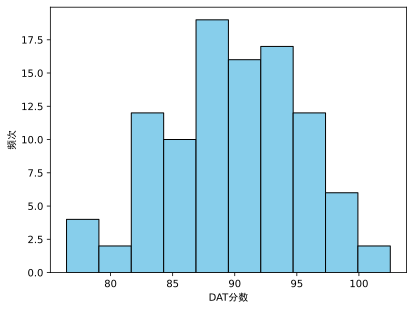

In [12]:
plt.rcParams['font.family'] = ['DejaVu Sans','SimHei']
plt.hist(DAT_scores, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('DAT分数')
plt.ylabel('频次')

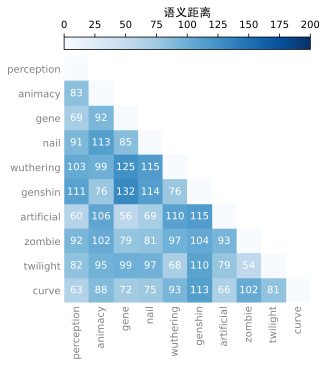

In [10]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# 假设 my_list 和 cosDistance 已经定义
# my_list = [...]  # 你的词列表
# def cosDistance(word1, word2): ...  # 你的余弦距离函数

# 初始化语义距离矩阵
semanticDistanceMatrix = np.zeros((len(my_list), len(my_list)))
for i, word1 in enumerate(my_list):
    for j, word2 in enumerate(my_list):
        semanticDistanceMatrix[i, j] = cosDistance(word1, word2) * 100

# 创建一个掩码，用于隐藏上三角部分
mask = np.triu(np.ones_like(semanticDistanceMatrix, dtype=bool))

# 将上三角部分设置为 NaN
semanticDistanceMatrix = np.where(mask, np.nan, semanticDistanceMatrix)

# 将对角线设置为一个特定的数值（例如 -1）
diagonal_value = -1
np.fill_diagonal(semanticDistanceMatrix, diagonal_value)

# 绘制矩阵
fig, ax = plt.subplots()
im = ax.imshow(semanticDistanceMatrix, cmap='Blues', interpolation='nearest', vmin=0, vmax=200)

# 设置刻度位置和标签
plt.xticks(np.arange(len(my_list)), my_list, rotation=90, color='grey')
plt.yticks(np.arange(len(my_list)), my_list, color='grey')

# 去除边框和刻度线
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='both', length=0)

# 在下三角部分显示数字
for i in range(len(my_list)):
    for j in range(len(my_list)):
        if i > j:  # 只在下三角部分显示数字
            text = f"{semanticDistanceMatrix[i, j]:.0f}"  # 格式化数字
            plt.text(j, i, text, ha='center', va='center', color='white')

# 调整 colorbar 的位置到右上角
divider = make_axes_locatable(ax)
cax = divider.append_axes("top", size="5%", pad=0.1)  # 将 colorbar 放在上方
cbar = plt.colorbar(im, cax=cax, orientation='horizontal')  # 设置 colorbar 为水平方向
cbar.set_label('语义距离', fontsize=12)

# 调整 colorbar 标签的位置
cax.xaxis.set_ticks_position('top')  # 将刻度放在上方
cax.xaxis.set_label_position('top')  # 将标签放在上方

plt.show()

In [18]:
# save DAT score to csv, column name is DAT_score
pd.DataFrame(DAT_scores, columns=['DAT_score']).to_csv(os.path.join(os.getcwd(),'..','glove.6B','DAT_scores_random100.csv'))

# save semantic distance matrix to csv
pd.DataFrame(semanticDistanceMatrix, index=my_list, columns=my_list).to_csv(os.path.join(os.getcwd(),'..','glove.6B','semantic_distance_matrix.csv'))

max greater number: 72
min greater number: 47
Mean DAT score: 88.91703485711936
Standard deviation: 0.5519655992457674


(array([ 1.,  6., 20., 24., 26., 13.,  5.,  4.,  0.,  1.]),
 array([87.52083434, 87.86892236, 88.21701038, 88.5650984 , 88.91318643,
        89.26127445, 89.60936247, 89.95745049, 90.30553851, 90.65362653,
        91.00171455]),
 <BarContainer object of 10 artists>)

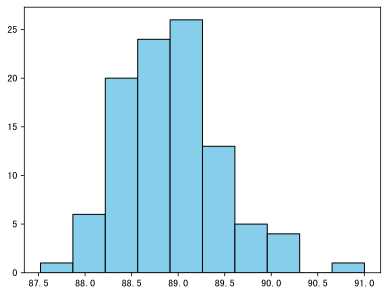

In [11]:
print(f'max greater number: {max(greaterNums)}')
print(f'min greater number: {min(greaterNums)}')

print(f"Mean DAT score: {np.mean(DAT_scores)}")
print(f"Standard deviation: {np.std(DAT_scores)}")

plt.hist(DAT_scores, bins=10, color='skyblue', edgecolor='black')

In [17]:
print(len([i for i in greaterNums if i > 50]))

99


(array([ 1.,  0.,  9.,  8., 16., 16., 21., 15.,  9.,  5.]),
 array([47. , 49.5, 52. , 54.5, 57. , 59.5, 62. , 64.5, 67. , 69.5, 72. ]),
 <BarContainer object of 10 artists>)

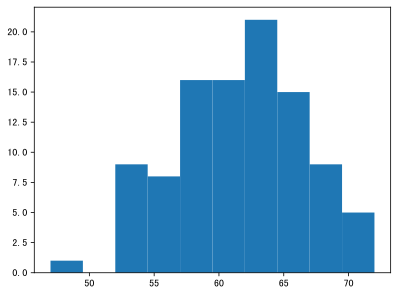

In [19]:
plt.hist(greaterNums)

In [20]:
print(np.mean(greaterNums))

61.47
